Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [10]:
# to run the cod eproperly save the dataset .csv file in same folder where the code file is
df = pd.read_csv('uber.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [16]:
df.dropna(inplace=True)

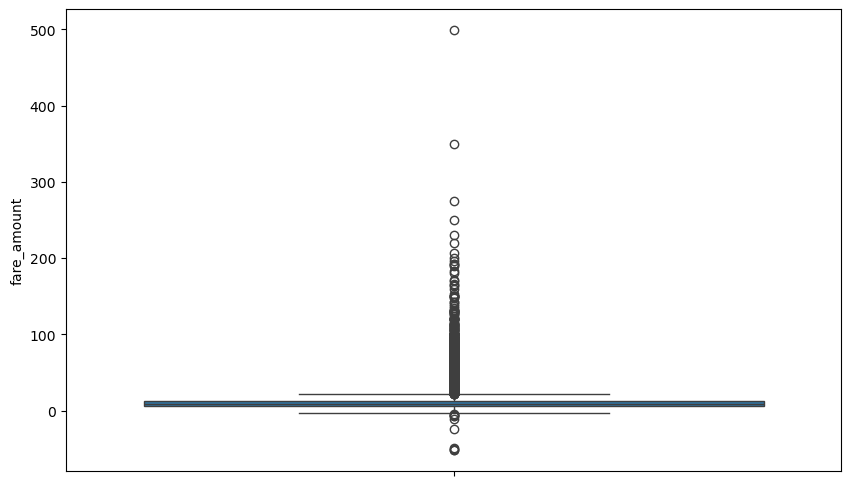

In [17]:
# identifying outliers
plt.figure(figsize=(10,6))
sns.boxplot(df['fare_amount'])
plt.show()

In [18]:
# removing outliers using z score
from scipy import stats

In [19]:
z_score = np.abs(stats.zscore(df['fare_amount']))
df = df[(z_score < 3)]

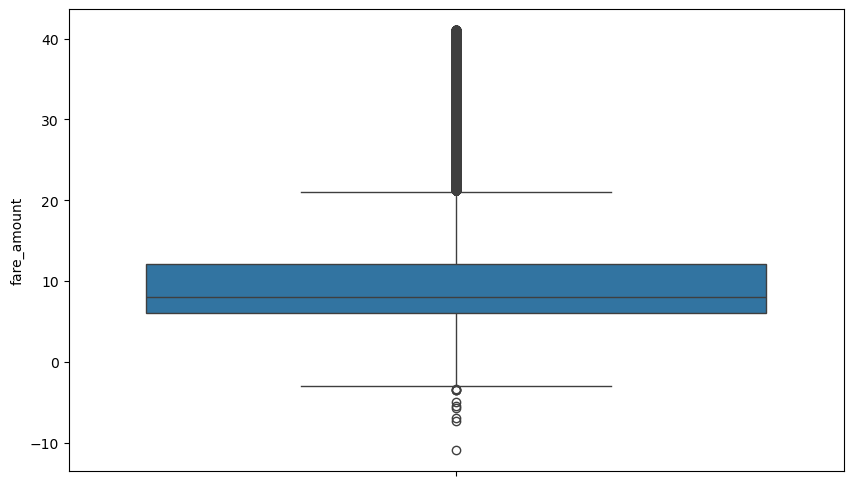

In [20]:
plt.figure(figsize = (10,6))
sns.boxplot(df['fare_amount'])
plt.show()

In [21]:
df['p_hour'] = df['pickup_datetime'].dt.hour
df['p_day'] = df['pickup_datetime'].dt.day
df['p_month'] = df['pickup_datetime'].dt.month

In [22]:
df.drop(['pickup_datetime'], axis = 1)

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,p_hour,p_day,p_month
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8
...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3
199997,27804658,2009-06-29 00:42:00.00000078,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6
199998,20259894,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5


In [23]:
num_df = df.select_dtypes(include =['number'])

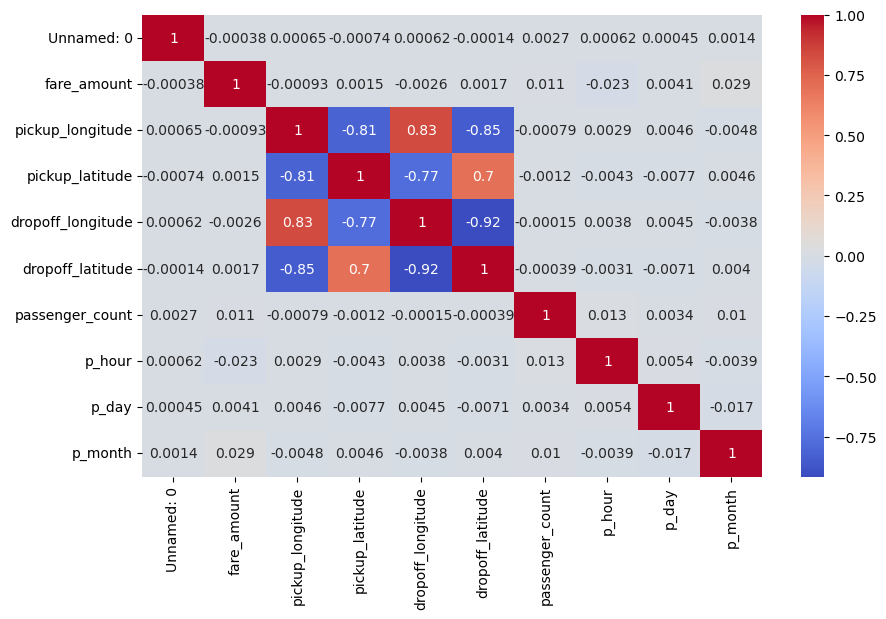

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
# preparing for ml models
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [27]:
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
# for linera regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
pred = lr.predict(x_test)

In [31]:
lr_rmse = np.sqrt(mean_squared_error(y_test,pred))
print(lr_rmse)

6.367048505308405


In [32]:
lr_r2 = r2_score(pred,y_test)
print(lr_r2)

-31192509.71647612


In [ ]:
# for random rfr
rfr = RandomForestRegressor(n_estimators=100, random_state = 42)
rfr.fit(x_train,y_train)

In [ ]:
rfr_pred = rfr.predict(x_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print(rfr_rmse)

In [ ]:
rfr_r2 = r2_score(y_test,rfr_pred)
print(rfr_r2)

In [ ]:
comp = pd.DataFrame({
    'Model' : ['Linear', 'RFR'],
    'Rmse' : [np.sqrt(mean_squared_error(y_test,pred)), np.sqrt(mean_squared_error(y_test,rfr_pred))],
    'R2_score' : [r2_score(pred,y_test), r2_score(y_test,rfr_pred)]
})
print(comp)